# Introduction

Experiment 2 measures the performance of HEFT and the selected GA algorithm, against a random planner, in terms of makespan, keeping the campaign constant to 1024 workflows and changes the number of resources. The resources are heterogeneous and are drawn by a normal distribution with $\mu=1$ and $\sigma=0.5$.

The following figure shows a histogram of the 128 resources. Because the resources are selected from a normal distribution, any negative value is discarded.

In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
resources = pd.read_csv('heterogeneous_resources.csv')

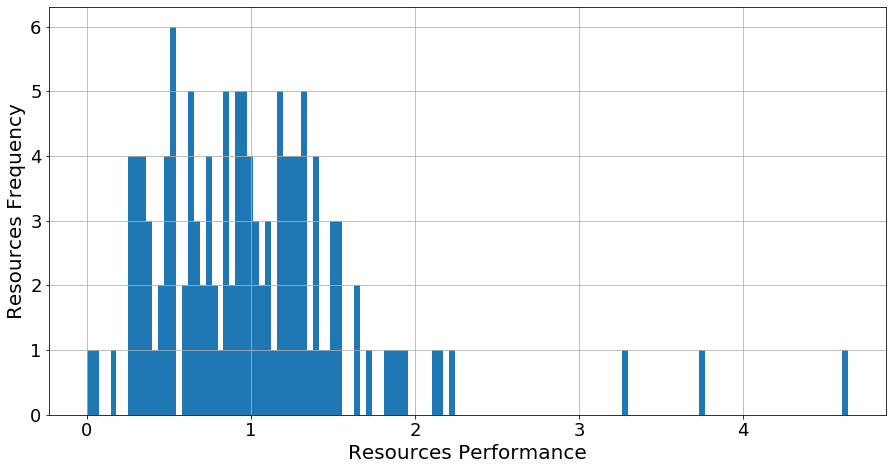

In [3]:
ax = resources['performance'].hist(bins=128, figsize=(15,7.5))
_ = ax.set_ylabel('Resources Frequency',fontsize=20)
_ = ax.set_xlabel('Resources Performance',fontsize=20)
_ = ax.set_xticklabels(ax.get_xticks().astype('int').tolist(),fontsize=18)
_ = ax.set_yticklabels(ax.get_yticks().astype('int').tolist(),fontsize=18)
_ = ax.grid('on')



# Homogeneous resources - Homogeneous workflows


In [4]:
HomogeResources_StHomogeCampaigns = pd.read_csv('HomogeResources_StHomogeCampaigns.csv')

HomogeResources_StHomogeCampaigns = HomogeResources_StHomogeCampaigns.groupby(by=['planner','size'])
HomogeResources_StHomogeCampaigns_makespan_means = HomogeResources_StHomogeCampaigns.mean()
HomogeResources_StHomogeCampaigns_makespan_stds = HomogeResources_StHomogeCampaigns.std()

In [5]:
print('Means')
print(HomogeResources_StHomogeCampaigns_makespan_means/1000)
print('STD')
print(HomogeResources_StHomogeCampaigns_makespan_stds/1000)

Means
               makespan      time
planner size                     
GA      4     19612.950  0.006657
        8     10242.375  0.006913
        16     5520.825  0.007002
        32     3092.400  0.007288
        64     1818.975  0.007185
        128    1125.300  0.007785
HEFT    4     19200.000  0.000005
        8      9600.000  0.000007
        16     4800.000  0.000009
        32     2400.000  0.000015
        64     1200.000  0.000031
        128     600.000  0.000059
RANDOM  4     20447.400  0.000004
        8     10814.775  0.000005
        16     5896.425  0.000007
        32     3318.600  0.000012
        64     1955.850  0.000019
        128    1215.075  0.000037
STD
                makespan      time
planner size                      
GA      4     181.180501  0.000482
        8     194.168576  0.001862
        16    162.741141  0.000486
        32    143.283880  0.000852
        64    111.828350  0.000588
        128    89.605743  0.000520
HEFT    4       0.000000  0.00

In [6]:
ideal = list()
for res in [4, 8, 16, 32, 64, 128]:
    ideal.append( ((75000 * 1024) / res) )

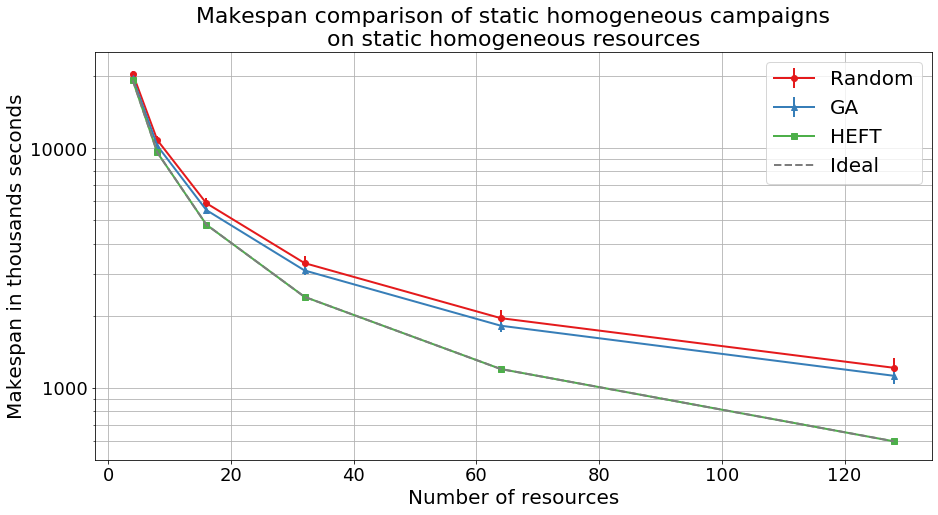

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=set1(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('GA').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('GA')['makespan'].values, color=set1(1),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT').index,HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=set1(2),linewidth=2)
_ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Ideal', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
#_ = axis.set_xscale('log', basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
fig.savefig('StHomoResources_StHomoCampaigns.png',bbox_inches='tight')
fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

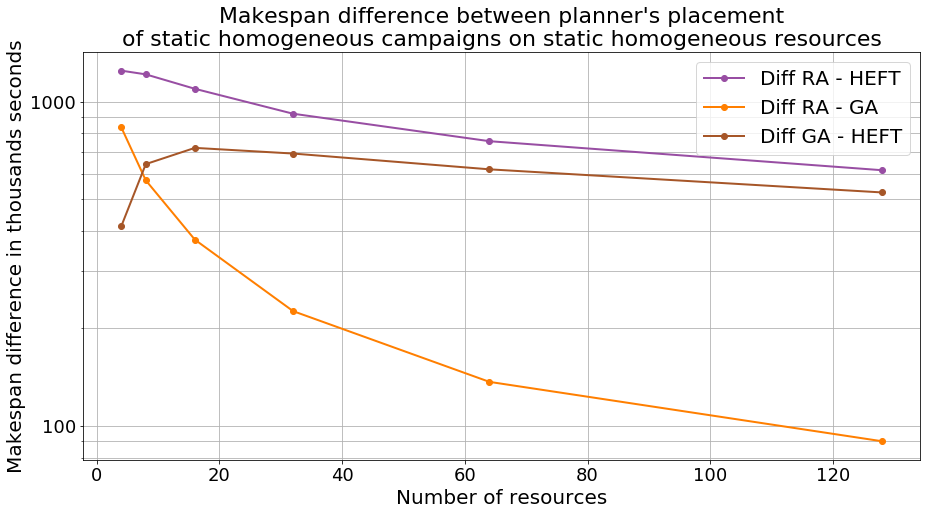

In [8]:
DiffStHomoCamp_4StHomoResHE = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=set1(3))
_ = axis.plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=set1(4))
_ = axis.plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=set1(6))
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.legend(fontsize=20)
_ = axis.set_title("Makespan difference between planner's placement\nof static homogeneous campaigns on static homogeneous resources", fontsize=22)
fig.savefig('StHomoResources_StHomoCampaigns_diff.png',bbox_inches='tight')

In [9]:
work_per_resource = pd.read_csv('workflows_per_resource.csv')
work_per_resource = work_per_resource.groupby(by=['planner','size'])
work_per_resource_mean = work_per_resource.mean()
work_per_resource_std = work_per_resource.std()

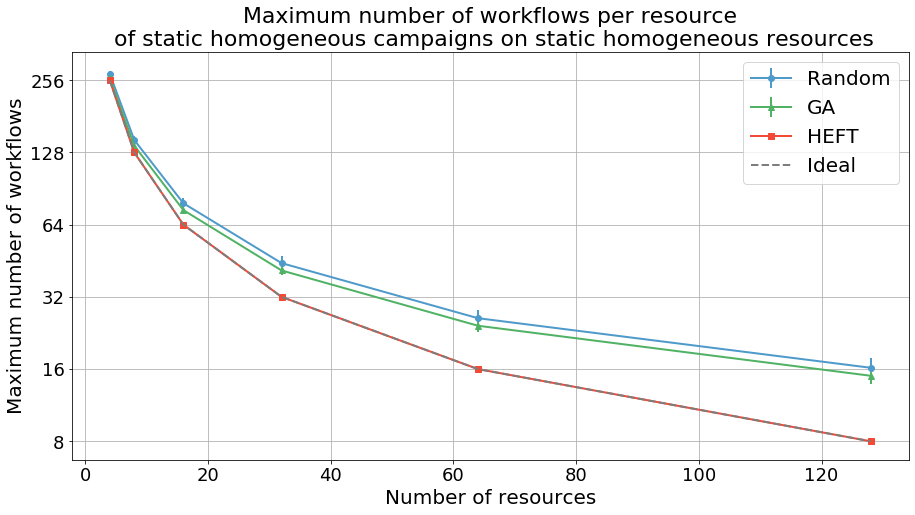

In [10]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(work_per_resource_mean.xs('RAND').index, work_per_resource_mean.xs('RAND')['freqs'].values, work_per_resource_std.xs('RAND')['freqs'].values, color=blues(150),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(work_per_resource_mean.xs('GA').index, work_per_resource_mean.xs('GA')['freqs'].values, work_per_resource_std.xs('GA')['freqs'].values, color=greens(150),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(work_per_resource_mean.xs('HEFT').index, work_per_resource_mean.xs('HEFT')['freqs'].values, color=reds(150),marker='s',label='HEFT',linewidth=2)
_ = axis.errorbar([4, 8, 16, 32, 64, 128], [256, 128, 64, 32, 16, 8], linestyle='--',label='Ideal', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log', basey=2)
_ = axis.set_ylabel('Maximum number of workflows',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Maximum number of workflows per resource\n of static homogeneous campaigns on static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
fig.savefig('StHomoResources_StHomoCampaigns_num.pdf',bbox_inches='tight')

# Heterogeneous resources - Homogeneous workflows 

The following figures compare the makespan of a homogeneous campaign. As we can see from the following figure....

In [11]:
HeteroResources_StHomogeCampaigns = pd.read_csv('HeteroResources_StHomogeCampaigns.csv')

HeteroResources_StHomogeCampaigns = HeteroResources_StHomogeCampaigns.groupby(by=['planner','size'])
HeteroResources_StHomogeCampaigns_makespan_means = HeteroResources_StHomogeCampaigns.mean()
HeteroResources_StHomogeCampaigns_makespan_stds = HeteroResources_StHomogeCampaigns.std()

In [12]:
print(HeteroResources_StHomogeCampaigns_makespan_means/1000)

                  makespan      time
planner size                        
GA      4     5.443695e+04  0.006721
        8     3.204938e+04  0.006914
        16    1.557856e+04  0.006828
        32    8.125956e+03  0.007087
        64    1.194987e+06  0.040264
        128   4.308360e+05  0.008253
HEFT    4     2.550734e+04  0.000006
        8     8.266829e+03  0.000010
        16    4.450604e+03  0.000015
        32    2.428489e+03  0.000028
        64    1.159915e+03  0.000048
        128   6.234852e+02  0.000102
RANDOM  4     5.800919e+04  0.000005
        8     3.604183e+04  0.000008
        16    1.814238e+04  0.000013
        32    9.582451e+03  0.000023
        64    2.108724e+06  0.000039
        128   1.050053e+06  0.000083


In [13]:
pprint(HeteroResources_StHomogeCampaigns_makespan_stds/1000)

                   makespan      time
planner size                         
GA      4       1522.048836  0.000542
        8       1839.749660  0.000463
        16      1142.584021  0.000462
        32       678.091022  0.000626
        64    219410.792561  0.303415
        128   139819.916594  0.000768
HEFT    4          0.000000  0.000006
        8          0.000000  0.000010
        16         0.000000  0.000009
        32         0.000000  0.000013
        64         0.000000  0.000014
        128        0.000000  0.000021
RANDOM  4       2248.555360  0.000005
        8       3006.809970  0.000007
        16      1979.322444  0.000012
        32      1147.841456  0.000013
        64    491365.092343  0.000014
        128   367184.619368  0.000020


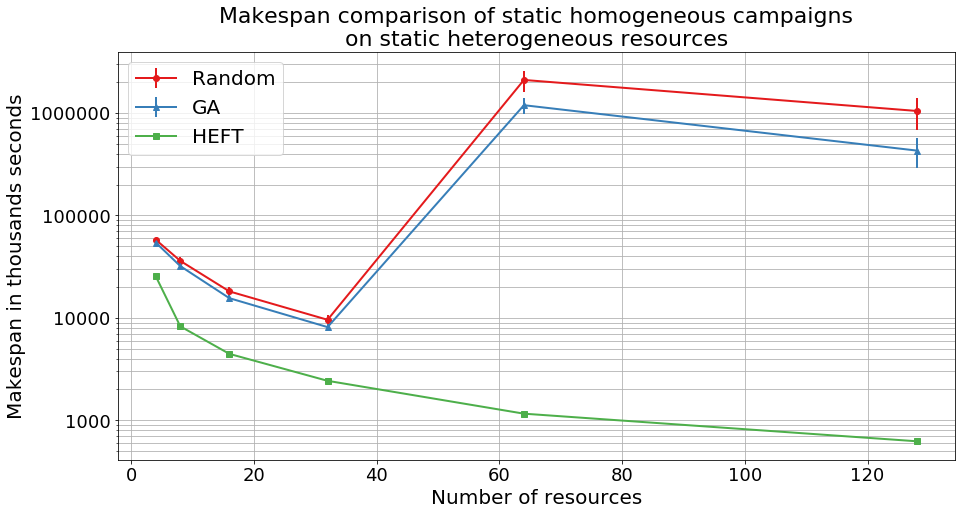

In [14]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=set1(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('GA').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('GA')['makespan'].values, color=set1(1),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT').index,HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=set1(2),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
fig.savefig('StHeteroResources_StHomoCampaigns.png',bbox_inches='tight')

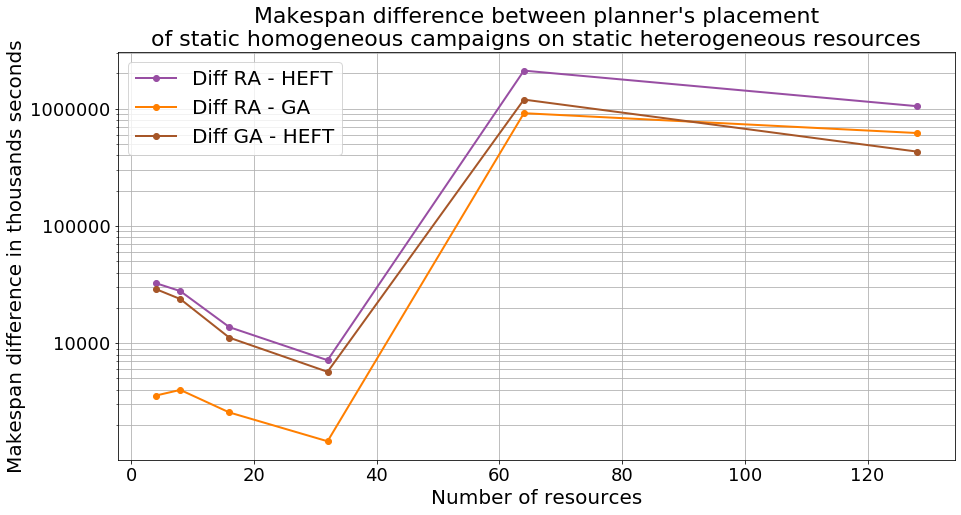

In [15]:
DiffStHomoCamp_4StHomoResHE = abs(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA = (HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=set1(3))
_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=set1(4))
_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=set1(6))
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.legend(fontsize=20)
_ = axis.set_title("Makespan difference between planner's placement\nof static homogeneous campaigns on static heterogeneous resources", fontsize=22)
fig.savefig('StHeteroResources_StHomoCampaigns_diff.png',bbox_inches='tight')

# Heterogeneous Campaign

The following figures compare the makespan of a heterogeneous campaign. The campaign is the same as in Experiment 1. As we can see from the following figure, HEFT provides the best makespan, while the random planner has the worst makespan. What is interesting is that the random planner's makespan increases significantly for 64 and 128 resources. The random planner's makespan is not only affected the number of workflows per resource, but also by which workflows are placed in each resource. 

In [16]:
HeteroResources_StHeteroCampaigns = pd.read_csv('HeteroResources_StHeteroCampaigns.csv')

HeteroResources_StHeteroCampaigns = HeteroResources_StHeteroCampaigns.groupby(by=['planner','size'])
HeteroResources_StHeteroCampaigns_makespan_means = HeteroResources_StHeteroCampaigns.mean()
HeteroResources_StHeteroCampaigns_makespan_stds = HeteroResources_StHeteroCampaigns.std()

In [17]:
#pprint(HeteroResources_StHeteroCampaigns_makespan_means/1000)

In [18]:
#pprint(HeteroResources_StHeteroCampaigns_makespan_stds/1000)

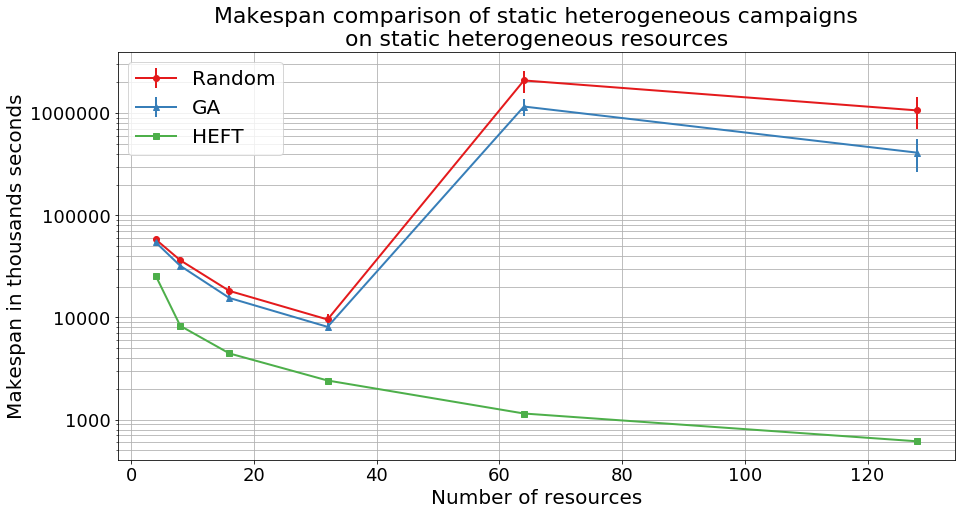

In [19]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values, HeteroResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=set1(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('GA').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values, HeteroResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=set1(1),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values, marker='s', label='HEFT', color=set1(2), linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
fig.savefig('StHeteroResources_StHeteroCampaigns.png',bbox_inches='tight')
fig.savefig('StHeteroResources_StHeteroCampaigns.pdf',bbox_inches='tight')

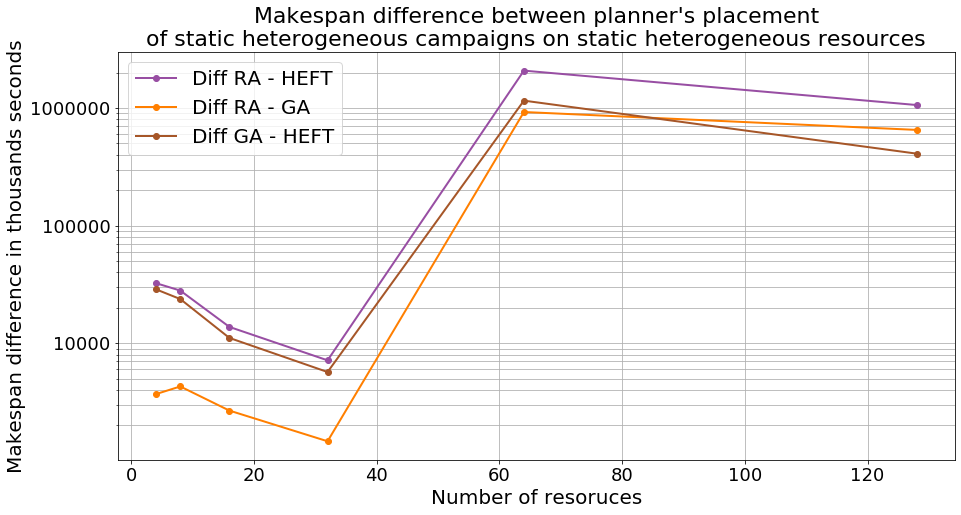

In [20]:
DiffStHomoCamp_4StHomoResHE = abs(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA = (HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=set1(3))
_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=set1(4))
_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=set1(6))
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resoruces',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.legend(fontsize=20)
_ = axis.set_title("Makespan difference between planner's placement\nof static heterogeneous campaigns on static heterogeneous resources", fontsize=22)
fig.savefig('StHeteroResources_StHeteroCampaigns_diff.png',bbox_inches='tight')
fig.savefig('StHeteroResources_StHeteroCampaigns_diff.pdf',bbox_inches='tight')